# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")


# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
print(f"Number of mice: {mice_count}")


Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Checking for duplicates   
duplicates = combined_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicates = combined_data[duplicates]
print(duplicates)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = duplicates["Mouse ID"].unique()
print(duplicate_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_data = combined_data[combined_data["Mouse ID"] == "g989"]
print(duplicate_data)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].nunique()
print(f"Number of mice in clean data: {clean_mice_count}")



Number of mice in clean data: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_data_grouped = clean_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = clean_data_grouped["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_data_grouped["Tumor Volume (mm3)"].median()
variance_tumor_volume = clean_data_grouped["Tumor Volume (mm3)"].var()
std_tumor_volume = clean_data_grouped["Tumor Volume (mm3)"].std()
sem_tumor_volume = clean_data_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Standard Deviation Tumor Volume": std_tumor_volume,
    "SEM Tumor Volume": sem_tumor_volume
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_data_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print(summary_statistics_agg)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

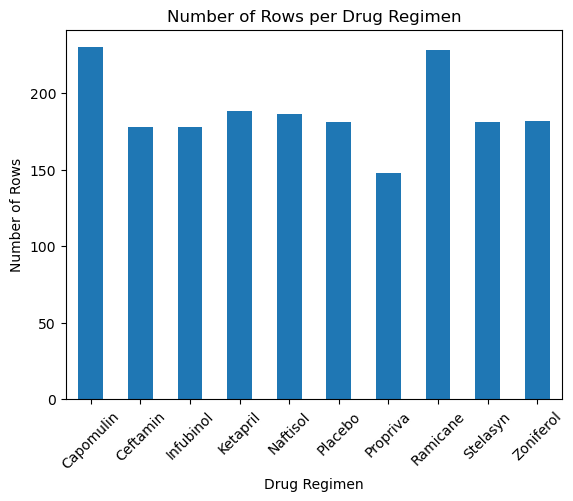

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = clean_data_grouped["Mouse ID"].count()
rows_per_regimen.plot(kind="bar", title="Number of Rows per Drug Regimen", ylabel="Number of Rows", xlabel="Drug Regimen", rot=45)
plt.show()


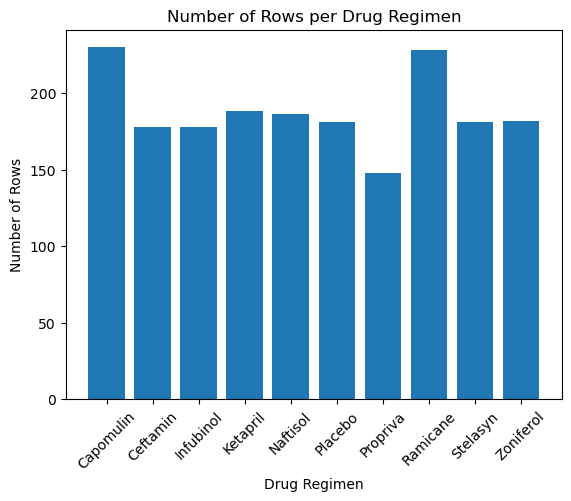

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows_per_regimen.index, rows_per_regimen.values)
plt.title("Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)
plt.show()




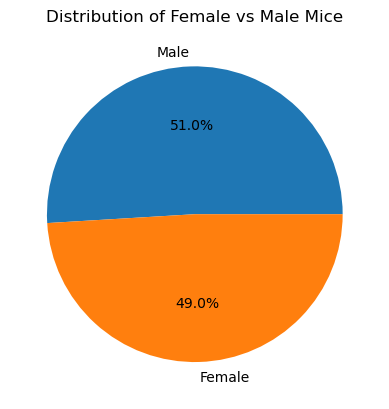

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the clean_data DataFrame contains the data
# with the 'Sex' column indicating the gender of mice

# Count the number of male and female mice
gender_counts = clean_data['Sex'].value_counts()

# Create a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Add labels and title
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')

# Display the plot
plt.show()









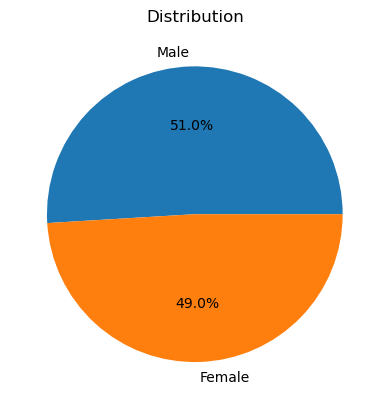

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = gender_counts.index.values
y = gender_counts.values

# Add labels and title
plt.xlabel
plt.ylabel
plt.title('Distribution')
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()




## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:   
# Capomulin, Ramicane, Infubinol, and Ceftamin




# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume = final_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_volume.head()



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,70.717621
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,63.440686


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(tumor_volumes)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Outliers for {treatment}: {outliers}")
    


Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


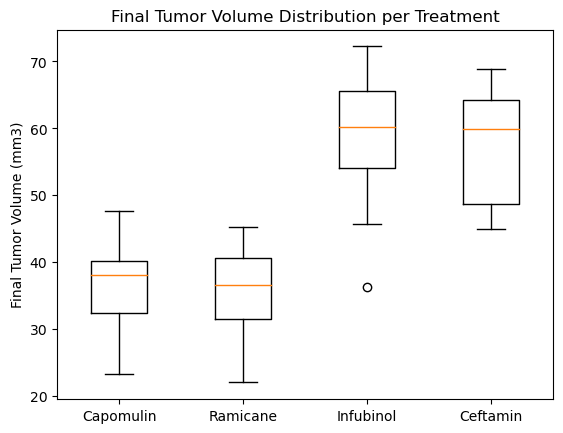

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume Distribution per Treatment")
plt.show()




## Line and Scatter Plots

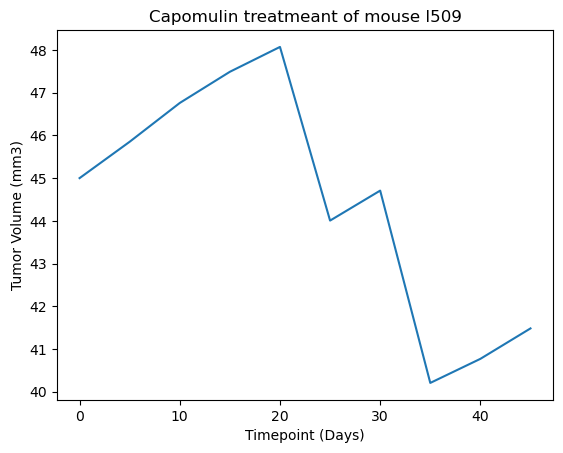

In [21]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mt_df = df.loc[(df['Drug Regimen']=='Capomulin') & (df['Mouse ID']=='l509')
                      ,['Tumor Volume (mm3)','Timepoint']]

plt.plot(single_mt_df['Timepoint'],single_mt_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()




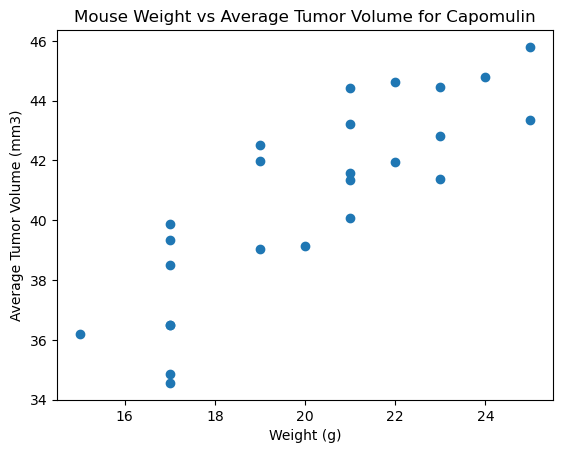

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = df.loc[df['Drug Regimen']=='Capomulin',['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.show()




## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


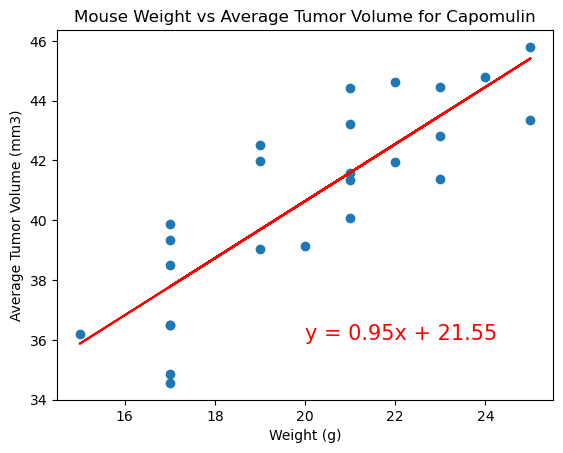

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin')
plt.show()



